# Comparison of spectrum between eNATL60 outputs and Alitka Satellite : method gonzag cloud on one track

Requisites :
 - git clone https://github.com/auraoupa/gonzag_cloud
 
 


In [1]:
import sys,os
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
GONZAG_CLOUD_DIR = '/home/jovyan/gonzag_cloud' ; 
sys.path.append(GONZAG_CLOUD_DIR)
import gonzag as gzc


In [3]:
import xarray as xr
import intake
import gcsfs
import os
import pandas as pd
import matplotlib.pyplot as plt

# With gonzag_cloud

In [4]:
model = 'eNATL60'
region = '1'
season = 'fma'
surf='surface_hourly'
name_mod = model+'-Region'+region+'-'+season
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask' 
name_lat_mod = 'lat'
name_lon_mod = 'lon'
name_time_mod = 'time_counter'
l_griddist = False
period_mod = ['2010-02-01','2010-04-30']

In [5]:
name_sat= 'Altika'
tag_sat_catalog = 'al'
name_ssh_sat='sla_unfiltered'
name_time_sat='time'
period_sat = ['2014-02-01','2014-04-30'] #should cover the same period of a different year if needed

In [6]:

gcs = gcsfs.GCSFileSystem(requester_pays=True)

cat = intake.open_catalog('../../SWOT-AdAC/catalog.yaml')
dsmod = cat[model](region=region,depth=surf, season=season).to_dask()

In [7]:
dsmod

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [8]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat[tag_sat_catalog].to_dask()

In [9]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185 ... 2015...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes: (12/24)
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    ...                        ...
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [10]:
ModelGrid = gzc.ModGrid( dsmod, period_mod, name_lon_mod, name_lat_mod , name_time_mod, dsmod, name_lsm_mod )



 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (763, 611)
     * horizontal resolution:  0.016657295  degrees or  1.8507920147292316  km
     * Is this a global domain w.r.t longitude:  False
       ==> this is a regional domain
       ==> working in the [0:360] frame...
     * lon_min, lon_max =  281.97 292.16
     * lat_min, lat_max =  30.0 39.99
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  2112
       ==> time record dates: 2010-02-01 to 2010-04-30, included



In [11]:
SatelliteTrack = gzc.SatTrack( dssat, period_sat, name_time_sat, name_ssh_sat, domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

 *** [SatTrack()] Analyzing the time vector in dataset ...

 *** About satellite track (target) domain:
     * number of time records of interest for the interpolation to come:  10225
       ==> time record indices: 14883510 to 19033581, included

       separated in 86 tracks


In [12]:
Solution0 = xr.open_dataset('../results/results_Altika-eNATL60-Region1-fma/result_00.nc')

In [13]:
print(ModelGrid.time)

['2010-02-01T00:30:00.000000000' '2010-02-01T01:30:00.000000000'
 '2010-02-01T02:30:00.000000000' ... '2010-04-30T21:30:00.000000000'
 '2010-04-30T22:30:00.000000000' '2010-04-30T23:30:00.000000000']


In [14]:
print(ModelGrid.lat.values)

[[29.996578 29.99662  29.99666  ... 30.02353  30.023575 30.02362 ]
 [30.01064  30.010681 30.010723 ... 30.037706 30.037752 30.037798]
 [30.024696 30.024738 30.02478  ... 30.05188  30.051926 30.051973]
 ...
 [39.75571  39.756042 39.756374 ... 39.970264 39.97063  39.970997]
 [39.767307 39.76764  39.76797  ... 39.982243 39.98261  39.982975]
 [39.7789   39.779232 39.779564 ... 39.994217 39.994583 39.994953]]


In [15]:
print(ModelGrid.lon.values)

[[281.99213 282.0088  282.02545 ... 292.12457 292.14124 292.1579 ]
 [281.9921  282.00876 282.02542 ... 292.1245  292.14117 292.15784]
 [281.99207 282.00873 282.0254  ... 292.12445 292.1411  292.15778]
 ...
 [281.85104 281.86768 281.88428 ... 291.96457 291.98123 291.99786]
 [281.85065 281.86728 281.88388 ... 291.9641  291.98077 291.99744]
 [281.85028 281.86688 281.88348 ... 291.96368 291.98032 291.99698]]


In [16]:
print(ModelGrid.domain_bounds)

[29.996578, 281.96854, 39.994953, 292.1579]


In [17]:
print(SatelliteTrack.time)

['2014-02-02T23:14:13.207444000' '2014-02-02T23:14:14.187444000'
 '2014-02-02T23:14:15.167444000' ... '2014-04-29T23:14:02.891097000'
 '2014-04-29T23:14:03.871097000' '2014-04-29T23:14:04.851097000']


In [18]:
print(SatelliteTrack.lat.values)

[39.973308 39.915793 39.858275 ... 30.154056 30.096212 30.038367]


In [19]:
print(SatelliteTrack.lon.values)

[289.681787 289.662966 289.644169 ... 287.489777 287.474097 287.458431]


In [20]:
print(SatelliteTrack.size)

10225


In [21]:
print(SatelliteTrack.keepit)

(array([  93133,   93134,   93135, ..., 4148222, 4148223, 4148224]),)


In [23]:
print(Solution0.time.values)

[1.39142327e+18 1.39142327e+18 1.39142327e+18 1.39142327e+18
 1.39142328e+18 1.39142328e+18 1.39142328e+18 1.39142328e+18
 1.39142328e+18 1.39142328e+18 1.39142328e+18 1.39142328e+18
 1.39142328e+18 1.39142328e+18 1.39142329e+18 1.39142329e+18
 1.39142329e+18 1.39142329e+18 1.39142329e+18 1.39142329e+18
 1.39142329e+18 1.39142329e+18 1.39142329e+18 1.39142329e+18
 1.39142330e+18 1.39142330e+18 1.39142330e+18 1.39142330e+18
 1.39142330e+18 1.39142330e+18 1.39142330e+18 1.39142330e+18
 1.39142330e+18 1.39142330e+18 1.39142331e+18 1.39142331e+18
 1.39142331e+18 1.39142331e+18 1.39142331e+18 1.39142331e+18
 1.39142331e+18 1.39142331e+18 1.39142331e+18 1.39142331e+18
 1.39142332e+18 1.39142332e+18 1.39142332e+18 1.39142332e+18
 1.39142332e+18 1.39142332e+18 1.39142332e+18 1.39142332e+18
 1.39142332e+18 1.39142332e+18 1.39142332e+18 1.39142333e+18
 1.39142333e+18 1.39142333e+18 1.39142333e+18 1.39142333e+18
 1.39142333e+18 1.39142333e+18 1.39142333e+18 1.39142333e+18
 1.39142333e+18 1.391423

In [25]:
Solution0

<xarray.Dataset>
Dimensions:         (time: 171)
Coordinates:
  * time            (time) float64 1.391e+18 1.391e+18 ... 1.391e+18 1.391e+18
Data variables:
    latitude        (time) float64 ...
    longitude       (time) float64 ...
    sossheig_np     (time) float64 ...
    sossheig_bl     (time) float64 ...
    sla_unfiltered  (time) float64 ...
    distance        (time) float64 ...
    time_counter    (time) datetime64[ns] ...
Attributes:
    about:    Created with Gonzag package => https://github.com/brodeau/gonzag

In [26]:
print(Solution0.latitude.values)

[30.010355 30.068213 30.126069 30.183924 30.241777 30.299628 30.357478
 30.415327 30.473173 30.531019 30.588863 30.646705 30.704545 30.762384
 30.820222 30.878058 30.935892 30.993725 31.051556 31.109386 31.167214
 31.22504  31.282865 31.340688 31.398509 31.456329 31.514147 31.571963
 31.629778 31.687592 31.745403 31.803213 31.861021 31.918828 31.976633
 32.034436 32.092237 32.150037 32.207836 32.265632 32.323427 32.38122
 32.439011 32.496801 32.554589 32.612375 32.670159 32.727942 32.785723
 32.843502 32.90128  32.959056 33.01683  33.074603 33.132372 33.190141
 33.247908 33.305673 33.363437 33.421197 33.478957 33.536716 33.594472
 33.652227 33.709979 33.76773  33.825479 33.883226 33.940971 33.998715
 34.056456 34.114195 34.171933 34.229669 34.287403 34.345135 34.402866
 34.460594 34.518321 34.576046 34.633769 34.691489 34.749208 34.806925
 34.86464  34.922353 34.980065 35.037774 35.095482 35.153187 35.21089
 35.268592 35.326291 35.499378 35.55707  35.614759 35.672447 35.730132
 35.7878

In [27]:
print(Solution0.longitude.values)

[289.118871 289.103209 289.087534 289.071844 289.05614  289.040423
 289.024693 289.008948 288.993191 288.97742  288.961636 288.945837
 288.930022 288.914195 288.898354 288.882498 288.866629 288.850746
 288.834849 288.818938 288.803012 288.78707  288.771115 288.755145
 288.739161 288.723163 288.707151 288.691124 288.675081 288.659023
 288.64295  288.626863 288.610762 288.594645 288.578514 288.562367
 288.546206 288.530028 288.513835 288.497627 288.481403 288.465165
 288.448912 288.432643 288.416359 288.400058 288.383741 288.367408
 288.351061 288.334697 288.318318 288.301923 288.285513 288.269086
 288.252642 288.236181 288.219705 288.203213 288.186705 288.170181
 288.15364  288.137083 288.120508 288.103916 288.087308 288.070683
 288.054042 288.037385 288.020711 288.00402  287.98731  287.970583
 287.953839 287.937079 287.920302 287.903507 287.886696 287.869867
 287.853019 287.836153 287.819271 287.80237  287.785452 287.768516
 287.751564 287.734593 287.717604 287.700595 287.683569 287.66

In [28]:
print(Solution0.sossheig_np)

<xarray.DataArray 'sossheig_np' (time: 171)>
array([-0.065417,  0.255569,  0.258921,  0.256327,  0.253743,  0.249762,
        0.243537,  0.239703,  0.233417,  0.222329,  0.217498,  0.228297,
        0.239881,  0.245336,  0.246085,  0.243646,  0.243385,  0.243419,
        0.243396,  0.242732,  0.242017,  0.242086,  0.24059 ,  0.235855,
        0.227699,  0.221322,  0.207348,  0.182774,  0.15788 ,  0.148719,
        0.143489,  0.13628 ,  0.132941,  0.131065,  0.131931,  0.138302,
        0.149549,  0.169259,  0.184183,  0.196478,  0.207957,  0.218829,
        0.23486 ,  0.2452  ,  0.255   ,  0.263741,  0.273129,  0.283862,
        0.287664,  0.289326,  0.287034,  0.285988,  0.286927,  0.287041,
        0.287533,  0.292421,  0.29405 ,  0.289943,  0.302417,  0.32644 ,
        0.339653,  0.339982,  0.333715,  0.327799,  0.324156,  0.320773,
        0.316094,  0.310619,  0.315194,  0.318124,  0.319477,  0.321902,
        0.327678,  0.324461,  0.316759,  0.311701,  0.306929,  0.307209,
      

In [29]:
print(Solution0.sossheig_bl)

<xarray.DataArray 'sossheig_bl' (time: 171)>
array([-0.065417,  0.256073,  0.259222,  0.256347,  0.253654,  0.249633,
        0.243381,  0.239639,  0.234677,  0.223485,  0.216928,  0.226962,
        0.239265,  0.245933,  0.246357,  0.244222,  0.244204,  0.244082,
        0.24375 ,  0.242816,  0.241957,  0.241971,  0.240806,  0.236314,
        0.227923,  0.221113,  0.205869,  0.17915 ,  0.158286,  0.149539,
        0.143822,  0.136335,  0.133247,  0.132009,  0.132559,  0.138978,
        0.150773,  0.167924,  0.183487,  0.196239,  0.207943,  0.219239,
        0.233271,  0.244164,  0.254243,  0.263096,  0.271166,  0.281526,
        0.289044,  0.289984,  0.286639,  0.28536 ,  0.286926,  0.287213,
        0.28749 ,  0.292732,  0.294393,  0.290054,  0.303239,  0.324281,
        0.339339,  0.339698,  0.334576,  0.327857,  0.323861,  0.320583,
        0.316102,  0.310217,  0.314284,  0.31762 ,  0.318868,  0.320461,
        0.325496,  0.325821,  0.319708,  0.313292,  0.30851 ,  0.307436,
      

In [30]:
print(Solution0.sla_unfiltered)

<xarray.DataArray 'sla_unfiltered' (time: 171)>
array([ 0.119,  0.118,  0.077,  0.065,  0.08 ,  0.1  ,  0.108,  0.034,  0.044,
        0.009,  0.015,  0.027,  0.024,  0.028,  0.018,  0.034,  0.071,  0.083,
        0.068,  0.051,  0.067,  0.086,  0.072,  0.09 ,  0.07 ,  0.116,  0.118,
        0.1  ,  0.115,  0.111,  0.1  ,  0.083,  0.078,  0.101,  0.105,  0.091,
        0.104,  0.097,  0.096,  0.083,  0.067,  0.083,  0.112,  0.11 ,  0.091,
        0.09 ,  0.077,  0.061,  0.074,  0.049,  0.061,  0.092,  0.081,  0.086,
        0.079,  0.07 ,  0.079,  0.071,  0.05 ,  0.053,  0.102,  0.093,  0.102,
        0.131,  0.122,  0.099,  0.045,  0.051,  0.068,  0.014,  0.011,  0.051,
        0.064,  0.065,  0.071,  0.061,  0.042,  0.074,  0.077,  0.098,  0.035,
        0.02 ,  0.062,  0.048,  0.027, -0.01 ,  0.011,  0.086,  0.033,  0.016,
       -0.003,  0.01 ,  0.033,  0.04 ,  0.049,  0.069,  0.043,  0.004,  0.053,
        0.073,  0.033,  0.05 ,  0.019,  0.045,  0.042,  0.019,  0.037,  0.056,
    

In [31]:
print(Solution0.distance)

<xarray.DataArray 'distance' (time: 171)>
array([1123.032071, 1129.62395 , 1136.216005, 1142.808321, 1149.400445,
       1155.992827, 1162.585273, 1169.177908, 1175.770604, 1182.36336 ,
       1188.956194, 1195.549302, 1202.142378, 1208.735576, 1215.328935,
       1221.92226 , 1228.515786, 1235.109491, 1241.703159, 1248.297004,
       1254.890938, 1261.484984, 1268.079204, 1274.673381, 1281.267664,
       1287.862225, 1294.456782, 1301.0514  , 1307.646227, 1314.241071,
       1320.835993, 1327.4311  , 1334.026263, 1340.62163 , 1347.216984,
       1353.812433, 1360.408062, 1367.003891, 1373.599619, 1380.195546,
       1386.791475, 1393.3876  , 1399.983791, 1406.580089, 1413.176581,
       1419.77307 , 1426.369686, 1432.966386, 1439.563295, 1479.146462,
       1485.743976, 1492.341585, 1498.939287, 1505.53719 , 1512.135207,
       1518.733206, 1525.331316, 1531.929623, 1538.528084, 1545.126523,
       1551.724984, 1558.323637, 1564.922504, 1571.521389, 1578.120248,
       1584.719426, 15

In [32]:
import time ; # to report execution speed of certain parts of the code...
import pandas as pd
import numpy as np
from gonzag.config import ldebug, ivrb, nb_talk, l_plot_meshes, deg2km, rfactor, search_box_w_km, l_save_track_on_model_grid, l_plot_meshes, rmissval
from gonzag.utils  import *
from gonzag.bilin_mapping import BilinTrack


In [34]:
MG=ModelGrid
ST=SatelliteTrack 
one_track=0

In [35]:
jt1=ST.index_tracks[one_track][0]
jt2=ST.index_tracks[one_track][1]

(Nj,Ni) = MG.shape

d_found_km = rfactor*MG.HResDeg*deg2km
np_box_radius = SearchBoxSize( MG.HResDeg*deg2km, search_box_w_km )
Nt = jt2 - jt1 ; # number of satellit observation point to work with here...
if_talk = Nt//nb_talk

In [36]:
print(d_found_km,np_box_radius,Nt)

1.3880940110469238 135 171


In [37]:
print(jt1,jt2)

168 339


In [38]:
BT = BilinTrack( ST.lat[jt1:jt2], ST.lon[jt1:jt2], MG.lat, MG.lon, src_grid_local_angle=MG.xangle, k_ew_per=MG.EWPer, rd_found_km=d_found_km, np_box_r=np_box_radius, freq_talk=if_talk )


In [39]:
from math import radians, cos, sin, asin, sqrt, pi, tan, log, atan2, copysign

import numpy as nmp

from gonzag.config  import ldebug, ivrb
from gonzag.utils   import Haversine, find_j_i_min, degE_to_degWE



In [40]:
Yt=ST.lat[jt1:jt2]
Xt=ST.lon[jt1:jt2]
Ys=MG.lat
Xs= MG.lon
src_grid_local_angle=MG.xangle
k_ew_per=MG.EWPer 
rd_found_km=d_found_km
np_box_r=np_box_radius
freq_talk=if_talk

In [41]:
    def nrpt( self ):
        xnp = nmp.zeros((self.Nt,2), dtype=nmp.int64)
        [jj,ji] = [self.nprad,self.nprad] ; # stupid first guess here...
        for jt in range(self.Nt):
            ltalk = ((jt+1)%self.ftalk==0)
            [jj,ji] = NearestPoint( (self.Yt[jt],self.Xt[jt]), self.Ys, self.Xs, \
                                    rd_found_km=self.rfound, j_prv=jj, i_prv=ji, np_box_r=self.nprad )
            if ji==0 or ji==self.Ni-1 and self.kewp == -1: [jj,ji] = [-1,-1]
            if jj==0 or jj==self.Nj-1:                     [jj,ji] = [-1,-1]
            
            xnp[jt,:] = [jj,ji]
        return xnp


In [42]:
    def srcm( self ):
        xsp = nmp.zeros((self.Nt,4,2), dtype=nmp.int64)

        for jt in range(self.Nt):
            [jP,iP] = self.NP[jt,:]
            if [jP,iP] != [-1,-1]:
                angle = 0.
                if nmp.shape(self.sangle) == nmp.shape(self.Ys): angle = self.sangle[jP,iP]
                xsp[jt,:,:] = IDSourceMesh( (self.Yt[jt],self.Xt[jt]), self.Ys, self.Xs, jP, iP, \
                                            k_ew_per=self.kewp, grid_s_angle=angle )
        return xsp

    def wght( self ):
        x4w = nmp.zeros((self.Nt,4))
        for jt in range(self.Nt):
            x4w[jt,:] = WeightBL( (self.Yt[jt],self.Xt[jt]), self.Ys, self.Xs, self.SM[jt,:,:] )
        return x4w


In [43]:
(Nt,) = nmp.shape(Yt)
Yt     = Yt.values
Xt     = Xt.values
Ys     = Ys.values
Xs     = Xs.values
sangle = src_grid_local_angle
kewp   = k_ew_per
rfound = rd_found_km
nprad  = np_box_r
(Nj,Ni) = Ys.shape
ftalk = 2*Nt   
NP = nmp.zeros((Nt,2)  , dtype=nmp.int64)

In [44]:
from gonzag.bilin_mapping import *

In [45]:
        xnp = nmp.zeros((Nt,2), dtype=nmp.int64)
        [jj,ji] = [nprad,nprad] ; # stupid first guess here...
        for jt in range(Nt):
            ltalk = ((jt+1)%ftalk==0)
            [jj,ji] = NearestPoint( (Yt[jt],Xt[jt]), Ys, Xs, \
                                    rd_found_km=rfound, j_prv=jj, i_prv=ji, np_box_r=nprad )
            if ji==0 or ji==Ni-1 and kewp == -1: [jj,ji] = [-1,-1]
            if jj==0 or jj==Nj-1:                     [jj,ji] = [-1,-1]
            
            xnp[jt,:] = [jj,ji]


In [85]:
jt=0
pcoor_trg=(Yt[jt],Xt[jt])
rd_found_km=rfound
j_prv=nprad
i_prv=nprad
np_box_r=nprad

In [86]:
print(pcoor_trg,rd_found_km,nprad)

(30.010355, 289.118871) 1.3880940110469238 135


In [97]:
    (yT,xT) = pcoor_trg
    (Ny,Nx) = Ys.shape
    #
    jy, jx = -1,-1 ; # Flag value...
    j1=max(j_prv-np_box_r,0) ; j2=min(j_prv+np_box_r+1,Ny)
    i1=max(i_prv-np_box_r,0) ; i2=min(i_prv+np_box_r+1,Nx)
    lfound = False
    rfnd = rd_found_km
    igo = 0


In [98]:
    while (not lfound) and igo<5 :
        igo = igo + 1
        if igo>1: (j1,i1 , j2,i2) = (0,0 , Ny,Nx) ; # Falling back on whole domain for second pass...
        xd = Haversine( yT, xT,  Ys[j1:j2,i1:i2], Xs[j1:j2,i1:i2] )
        jy, jx = find_j_i_min( xd )
        lfound = ( xd[jy,jx] < rfnd )
        if igo>1 and not lfound:
            rfnd = 1.25*rfnd ; # increasing validation distance criterion by 25 %


In [99]:
print(jy,jx)

0 428


In [88]:
print(Ny,Nx,j1,j2,i1,i2)

763 611 0 271 0 271


In [89]:
        igo = igo + 1
        if igo>1: (j1,i1 , j2,i2) = (0,0 , Ny,Nx) ; # Falling back on whole domain for second pass...
        xd = Haversine( yT, xT,  Ys[j1:j2,i1:i2], Xs[j1:j2,i1:i2] )


In [90]:
xd

array([[684.9704 , 683.36926, 681.7682 , ..., 255.73904, 254.13745,
        252.53584],
       [684.92316, 683.3221 , 681.72107, ..., 255.72997, 254.12854,
        252.52711],
       [684.8793 , 683.2784 , 681.67755, ..., 255.72757, 254.12636,
        252.52516],
       ...,
       [785.8036 , 784.4635 , 783.12445, ..., 479.76962, 478.9541 ,
        478.14392],
       [786.526  , 785.1876 , 783.85   , ..., 481.02206, 480.20917,
        479.3997 ],
       [787.25055, 785.9134 , 784.5773 , ..., 482.2743 , 481.4633 ,
        480.6564 ]], dtype=float32)

In [91]:
jy, jx = find_j_i_min( xd )

In [94]:
print(jy,jx,xd[jy,jx],igo)

2 270 252.52516 1


In [95]:
igo = igo + 1
if igo>1: (j1,i1 , j2,i2) = (0,0 , Ny,Nx) 
xd = Haversine( yT, xT,  Ys[j1:j2,i1:i2], Xs[j1:j2,i1:i2] )
jy, jx = find_j_i_min( xd )
print(jy,jx,xd[jy,jx])

0 428 0.7836631


In [96]:
print(rfnd)

1.3880940110469238


In [46]:
xnp

array([[ -1,  -1],
       [  4, 427],
       [  8, 426],
       [ 12, 425],
       [ 16, 424],
       [ 20, 423],
       [ 24, 422],
       [ 28, 421],
       [ 33, 420],
       [ 37, 419],
       [ 41, 418],
       [ 45, 417],
       [ 49, 416],
       [ 53, 416],
       [ 57, 415],
       [ 61, 414],
       [ 66, 413],
       [ 70, 412],
       [ 74, 411],
       [ 78, 410],
       [ 82, 409],
       [ 86, 408],
       [ 91, 407],
       [ 95, 406],
       [ 99, 405],
       [103, 404],
       [107, 403],
       [111, 402],
       [116, 401],
       [120, 401],
       [124, 400],
       [128, 399],
       [132, 398],
       [137, 397],
       [141, 396],
       [145, 395],
       [149, 394],
       [154, 393],
       [158, 392],
       [162, 391],
       [166, 390],
       [170, 389],
       [175, 388],
       [179, 387],
       [183, 386],
       [187, 385],
       [192, 384],
       [196, 383],
       [200, 383],
       [205, 382],
       [209, 381],
       [213, 380],
       [217,

In [47]:
NP=xnp

In [48]:
        xsp = nmp.zeros((Nt,4,2), dtype=nmp.int64)

        for jt in range(Nt):
            [jP,iP] = NP[jt,:]
            if [jP,iP] != [-1,-1]:
                angle = 0.
                if nmp.shape(sangle) == nmp.shape(Ys): angle = sangle[jP,iP]
                #
                xsp[jt,:,:] = IDSourceMesh( (Yt[jt],Xt[jt]), Ys, Xs, jP, iP, \
                                            k_ew_per=kewp, grid_s_angle=angle )


In [49]:
print(xsp)

[[[  0   0]
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  4 427]
  [  4 426]
  [  3 426]
  [  3 427]]

 [[  8 426]
  [  8 425]
  [  7 425]
  [  7 426]]

 ...

 [[758 263]
  [758 262]
  [757 262]
  [757 263]]

 [[  0   0]
  [  0   0]
  [  0   0]
  [  0   0]]

 [[  0   0]
  [  0   0]
  [  0   0]
  [  0   0]]]


In [50]:
SM=xsp

In [51]:
        x4w = nmp.zeros((Nt,4))
        #
        for jt in range(Nt):
            x4w[jt,:] = WeightBL( (Yt[jt],Xt[jt]), Ys, Xs, SM[jt,:,:] )
        #


In [52]:
x4w


array([[2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
       [5.40091964e-01, 2.07510822e-01, 7.00574613e-02, 1.82339753e-01],
       [6.72770226e-01, 1.73604741e-01, 3.15108967e-02, 1.22114137e-01],
       [8.21780913e-01, 1.26666175e-01, 6.88494937e-03, 4.46679627e-02],
       [8.86659648e-01, 5.05259655e-02, 3.38647701e-03, 5.94279097e-02],
       [8.29676831e-01, 7.52098935e-03, 1.46253780e-03, 1.61339642e-01],
       [6.68140583e-01, 5.66715467e-02, 2.15163649e-02, 2.53671505e-01],
       [5.19156094e-01, 8.99084053e-02, 5.77088099e-02, 3.33226691e-01],
       [3.99917358e-01, 3.84143437e-01, 1.05797445e-01, 1.10141761e-01],
       [4.52689841e-01, 2.62760658e-01, 1.04505363e-01, 1.80044138e-01],
       [4.91468267e-01, 1.56139344e-01, 8.49624300e-02, 2.67429959e-01],
       [5.15968334e-01, 6.46836456e-02, 4.67146582e-02, 3.72633363e-01],
       [5.01677277e-01, 4.76608522e-01, 1.05788856e-02, 1.11353160e-02],
       [4.64964655e-01, 8.75236129e-02, 7.08935300e

In [53]:
WB=x4w

In [109]:
print(Nt)

171


In [111]:
jt=Nt-1
[jj,ji] = NP[jt,:]
print(ST.lon[jt1+jt].values,ST.lat[jt1+jt].values, SM[jt,:,:], WB[jt,:])

286.181521 39.935376 [[0 0]
 [0 0]
 [0 0]
 [0 0]] [0.25 0.25 0.25 0.25]


In [55]:
jt=1
[jj,ji] = NP[jt,:]
print(ST.lon[jt1+jt].values,ST.lat[jt1+jt].values, SM[jt,:,:], WB[jt,:])

289.103209 30.068213 [[  4 427]
 [  4 426]
 [  3 426]
 [  3 427]] [0.54009196 0.20751082 0.07005746 0.18233975]


In [56]:
        vssh_m_np = nmp.zeros(Nt) ; vssh_m_np[:] = rmissval; # vector to store the model data interpolated in time and space (nearest-point) on the satellite track...
        vssh_m_bl = nmp.zeros(Nt) ; vssh_m_bl[:] = rmissval; # vector to store the model data interpolated in time and space (bilinear) on the satellite track...
        vdistance = nmp.zeros(Nt)
    
        # Time increment on the satellite time:
        ktm1   = 0   ; ktm2   = 0
        ktm1_o = -10 ; ktm2_o = -10


In [128]:
jt=jt2-1
itt = ST.time[jt]
year_sat=pd.to_datetime(itt).year
date_model=pd.Series(MG.time)
date_model_satyear=date_model.apply(lambda dt: dt.replace(year=year_sat))
kt = ktm1
while not (date_model_satyear[kt]<=itt and date_model_satyear[kt+1]>itt): kt=kt+1
print(itt,kt,MG.time[kt])

2014-02-03T10:30:40.499834000 58 2010-02-03T10:30:00.000000000


In [129]:
ktm1 = kt ; ktm2 = kt+1


In [130]:
from gonzag.io   import GetModel2DVar, GetSatSSH

In [131]:
            if (ktm1>ktm1_o) and (ktm2>ktm2_o):
                if (ktm1_o == -10) or (ktm1 > ktm2_o):
                    if ivrb>0: print(' *** Reading '+name_ssh_mod+' in '+MG.file+'\n    => at ktm1=', ktm1)
                    Xm1 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm1 )
                else:
                    Xm1[:,:] = Xm2[:,:]


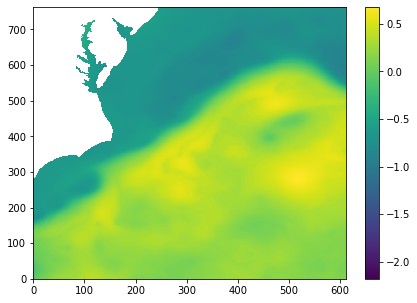

In [132]:
fig=plt.figure(figsize=[7,5])
plt.pcolormesh(Xm1)
plt.colorbar()
plt.savefig('../plots/debug/plot_gonzag_cloud_Xm1.png')

In [133]:
Xm2 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm2 )

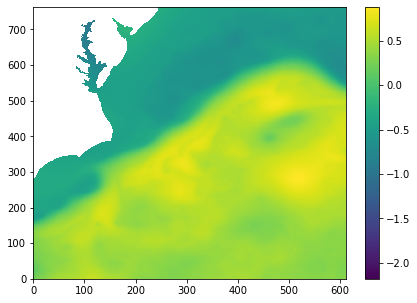

In [134]:
fig=plt.figure(figsize=[7,5])
plt.pcolormesh(Xm2)
plt.colorbar()
plt.savefig('../plots/debug/plot_gonzag_cloud_Xm2.png')

In [135]:
Xa = (Xm2 - Xm1) / float((MG.time[ktm2] - MG.time[ktm1] )/ np.timedelta64(1, 's'))

In [136]:
print(float((MG.time[ktm2] - MG.time[ktm1] )/ np.timedelta64(1, 's')))

3600.0


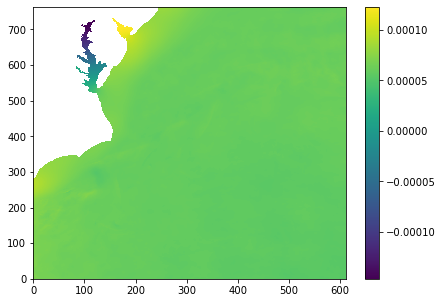

In [137]:
fig=plt.figure(figsize=[7,5])
plt.pcolormesh(Xa)
plt.colorbar()
plt.savefig('../plots/debug/plot_gonzag_cloud_Xa.png')

In [138]:
Xm = Xm1[:,:] + Xa[:,:]*float((itt - date_model_satyear[ktm1])/ np.timedelta64(1, 's'))

In [139]:
print(float((itt - date_model_satyear[ktm1])/ np.timedelta64(1, 's')))

40.499834


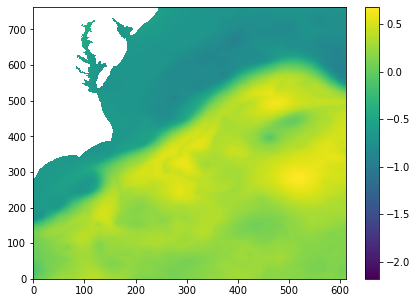

In [140]:
fig=plt.figure(figsize=[7,5])
plt.pcolormesh(Xm)
plt.colorbar()
plt.savefig('../plots/debug/plot_gonzag_Xm.png')

In [141]:
print(jt2-jt1)

171


In [142]:
[ [j1,i1],[j2,i2],[j3,i3],[j4,i4] ] = SM[jt-jt1,:,:]
[w1, w2, w3, w4]                    = WB[jt-jt1,:]

In [143]:
print([j1,i1],[j2,i2],[j3,i3],[j4,i4])

[0, 0] [0, 0] [0, 0] [0, 0]


In [144]:
print([w1, w2, w3, w4])

[0.25, 0.25, 0.25, 0.25]


In [145]:
Sm = MG.mask[j1,i1] + MG.mask[j2,i2] + MG.mask[j3,i3] + MG.mask[j4,i4]

In [146]:
print(MG.mask[j1,i1].values)

1


In [147]:
MG.mask.values

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [148]:
vssh_m_np[jt-jt1] = Xm[j1,i1]

In [149]:
print(j1,i1,Xm[j1,i1].values)

0 0 -0.054837257
